In [4]:
import mujoco
import numpy as np
import glfw
import mediapy as media

In [5]:
# Create a new MuJoCo model
model = mujoco.MjModel.from_xml_string("""
<mujoco>
    <worldbody>
        <body name="cart" pos="0 0 0.1">
            <geom type="box" size="0.2 0.2 0.1" rgba="0.8 0.2 0.2 1"/>
            <joint type="slide" axis="1 0 0" name="x"/>
            <joint type="slide" axis="0 1 0" name="y"/>
        </body>
    </worldbody>
    <actuator>
        <motor joint="x" ctrlrange="-1 1" ctrllimited="true"/>
        <motor joint="y" ctrlrange="-1 1" ctrllimited="true"/>
    </actuator>
</mujoco>
""")

# Initialize the simulation data
data = mujoco.MjData(model)

""

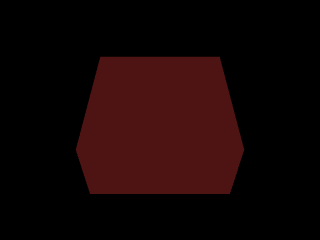

In [6]:
renderer = mujoco.Renderer(model)

mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())

In [10]:
from mujoco import viewer

In [11]:
viewer.launch(model)

2024-04-15 17:54:53.737 Python[64838:692981] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


카트폴 코드 참조해서, 빨리 프로토타입만 한번 만들어보자!

In [7]:
model.cam

In [ ]:
mujoco.mjv_updateS

In [8]:
# Create a GLFW window
glfw.init()
window = glfw.create_window(800, 600, "3D Cart", None, None)
glfw.make_context_current(window)
# mujoco.mjv_defaultCamera(model.vis.cam)

# Simulation loop
while not glfw.window_should_close(window):
    # Get keyboard input
    x_force = 0.0
    y_force = 0.0
    if glfw.get_key(window, glfw.KEY_LEFT) == glfw.PRESS:
        x_force = -1.0
    if glfw.get_key(window, glfw.KEY_RIGHT) == glfw.PRESS:
        x_force = 1.0
    if glfw.get_key(window, glfw.KEY_DOWN) == glfw.PRESS:
        y_force = -1.0
    if glfw.get_key(window, glfw.KEY_UP) == glfw.PRESS:
        y_force = 1.0

    # Apply forces to the cart
    data.ctrl[0] = x_force
    data.ctrl[1] = y_force

    # Step the simulation
    mujoco.mj_step(model, data)

    # Render the simulation
    # mujoco.mjv_updateScene(model, data, model.vis.ptr, model.vis.camera.ptr)
    mujoco.mjv_updateScene
    # mujoco.mjr_render(model.vis.viewport.width, model.vis.viewport.height, model.vis.ptr)
    glfw.swap_buffers(window)
    glfw.poll_events()

# Close the GLFW window and terminate
glfw.terminate()


TypeError: mjv_defaultCamera(): incompatible function arguments. The following argument types are supported:
    1. (cam: mujoco._structs.MjvCamera) -> None

Invoked with: <bound method PyCapsule.cam of <mujoco._structs.MjModel object at 0x111af2f30>>